From the given "iris" dataset, predict the optimum number of clusters and represent it visually

In [10]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [11]:
#Loading iris dataset
iris = datasets.load_iris()
irisdata_df = pd.DataFrame(iris.data, columns = iris.feature_names)
irisdata_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
irisdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
irisdata_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#Finding the optimum number of clusters for k-means classification
x = irisdata_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

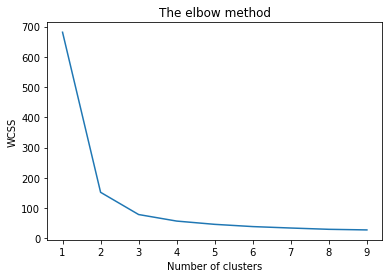

In [15]:
#Visualization using elbow method
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [16]:
#Determining optimum number of clusters using silhouette score
from sklearn.metrics import silhouette_score
for clusters in range(2,15):
    clusterer=KMeans(n_clusters=clusters)
    pred=clusterer.fit_predict(irisdata_df)
    centers=clusterer.cluster_centers_
    score=silhouette_score(irisdata_df,pred,metric='euclidean')
    print("For n number of clusters={},silhouette score is {})".format(clusters,score))    

For n number of clusters=2,silhouette score is 0.681046169211746)
For n number of clusters=3,silhouette score is 0.5528190123564091)
For n number of clusters=4,silhouette score is 0.4980505049972867)
For n number of clusters=5,silhouette score is 0.49123997967644706)
For n number of clusters=6,silhouette score is 0.3674845748098299)
For n number of clusters=7,silhouette score is 0.3588294450965675)
For n number of clusters=8,silhouette score is 0.35006029596867255)
For n number of clusters=9,silhouette score is 0.3263554408272613)
For n number of clusters=10,silhouette score is 0.31911661901104593)
For n number of clusters=11,silhouette score is 0.31323355246956636)
For n number of clusters=12,silhouette score is 0.31517507241653725)
For n number of clusters=13,silhouette score is 0.3149381371339226)
For n number of clusters=14,silhouette score is 0.28706533257186445)


In [17]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

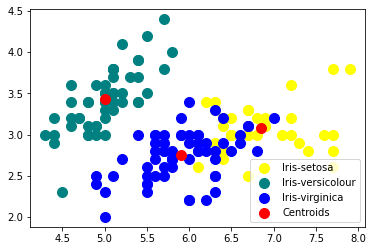

In [18]:
#Visualization of clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'teal', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()